# PyCalcolAr
### Inizializzazione

In [79]:
# Importare le librerie utili per la creazione del codice
import pandas as pd
import numpy as np
import math 
from IPython.display import display

pd.set_option('display.max_columns', None)

# Variabili utilizzate nel calcolo, da modificare manualmente dall'utente  
delay = 246

### Importazione files
### > file triplo36 (file di calibrazione dell'aria)

In [80]:
# definire il percorso del file
file_path = "../test_data/Triplo36.txt"

# definire la lista con gli indici delle colonne 
columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0', 'Run', 'Path']

# trasformare le colonne in dati numerici (ad eccezione delle colonne 'Run' e 'Path')
columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0']

# importare il file utilizzando caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne relative all'errore
airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
for i in columns_numeric:
    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
print("Air pipette initial imported data:")

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe airpipette_data
airpipette_data = pd.concat([run_name, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
airpipette_data.drop('Run',axis=1, inplace=True)

# Conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)

airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
airpipette_data.loc[:,'36F'] = airpipette_data.loc[:,'36F'].values / 62415000
airpipette_data.loc[:,'err 36F'] = airpipette_data.loc[:,'err 36F'].values / 62415000

#airpipette_data

display(airpipette_data)

Air pipette initial imported data:


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
0,Sample Name,2015-10-06 10:33:00,0.73900,0.00400,0.000799,9.292638e-07,0.001154,0.000004,0.004150,0.000003,0.002307,0.000021,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2015-10-06 10:52:00,1.22000,0.00041,0.000796,9.613074e-07,0.001211,0.000003,0.004134,0.000003,0.004021,0.000014,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-10-06 11:23:00,1.22000,0.00051,0.000798,8.171113e-07,0.001230,0.000003,0.004150,0.000002,0.004021,0.000015,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-10-08 10:13:00,0.75800,0.00400,0.000796,8.811984e-07,0.001067,0.000004,0.004134,0.000002,0.002307,0.000018,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-10-08 10:27:00,1.09000,0.00036,0.000694,1.009373e-06,0.000974,0.000003,0.003589,0.000002,0.003525,0.000022,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Sample Name,2020-06-23 11:02:00,1.65538,0.00053,0.000886,1.265721e-06,0.004927,0.000004,0.004775,0.000004,0.005568,0.000018,Raw data stored in - C:\Nu Noble\Results\Data...
830,Sample Name,2020-06-24 09:25:00,1.65331,0.00043,0.000884,1.441961e-06,0.004896,0.000004,0.004765,0.000005,0.005594,0.000021,Raw data stored in - C:\Nu Noble\Results\Data...
831,Sample Name,2020-06-24 09:50:00,1.65039,0.00049,0.000891,1.313787e-06,0.004914,0.000003,0.004798,0.000004,0.005575,0.000021,Raw data stored in - C:\Nu Noble\Results\Data...
832,Sample Name,2020-06-24 10:08:00,1.64847,0.00056,0.000891,1.009373e-06,0.004916,0.000004,0.004792,0.000004,0.005553,0.000022,Raw data stored in - C:\Nu Noble\Results\Data...


### > file run4 e run22 (file di misura)

In [81]:
# definire la lista con gli indici delle colonne 
column_names_run4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']
column_names_run22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']

# definire il percorso dei file
file_path_4 = "../test_data/Run4.txt"
file_path_22 = "../test_data/Run22.txt"

# importare i file run
df_data_4 = pd.read_csv(file_path_4, header = None, index_col= False, names = column_names_run4, sep = '\t|,', engine = 'python')
df_data_22 = pd.read_csv(file_path_22, header = None, index_col= False, names = column_names_run22, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne
df_data_4 = df_data_4.replace(["{", "}"], ["", ""], regex=True)
df_data_22 = df_data_22.replace(["{", "}"], ["", ""], regex=True)

# definire nome delle colonne che contengono dati numerici
colnames_numeric_4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']   
colnames_numeric_22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']

# convertire tutte le colonne del dataframe df_data_4 a numeric (float64)
for i in colnames_numeric_4:
    df_data_4[i] = pd.to_numeric(df_data_4[i])

# convertire tutte le colonne del dataframe df_data_22 a numeric (float64)
for i in colnames_numeric_22:
    df_data_22[i] = pd.to_numeric(df_data_22[i])

df_data = pd.concat([df_data_4, df_data_22], axis=0)

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = df_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe df_data
df_data = pd.concat([run_name, dataora, df_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
df_data.drop('Run',axis=1, inplace=True)

display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,36Ar IC0,err36Ar IC0,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,fishcanyon bt stp1,2015-04-08 16:03:00,0.847000,0.000370,0.000493,3.700000e-07,0.002460,3.900000e-06,0.000047,0.000015,0.002610,1.300000e-06,0.000097,0.000016,0.000021,7.700000e-08,0.000013,6.000000e-08,2.460000e-04,1.600000e-06,-5.380000e-09,6.600000e-09,0.396,0.064,1.060000,0.0018,345.000,0.57,325.000,0.21,Raw data stored in - C:\Nu Noble\Results\Data...
1,fishcanyon bt stp2,2015-04-08 16:33:00,2.300000,0.000870,0.001540,8.500000e-07,0.006340,9.200000e-06,0.000107,0.000013,0.006510,2.500000e-06,0.002540,0.000011,0.000023,8.300000e-08,0.000014,7.100000e-08,9.520000e-04,4.800000e-06,6.160000e-08,1.000000e-08,2.670,0.018,1.030000,0.0015,363.000,0.55,354.000,0.19,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-04-08 17:28:00,1.080000,0.000350,0.000750,5.000000e-07,0.002850,5.400000e-06,0.000037,0.000012,0.003050,1.400000e-06,0.002350,0.000012,0.000013,6.900000e-08,0.000014,7.500000e-08,5.420000e-04,2.400000e-06,9.320000e-09,8.200000e-09,4.340,0.029,1.070000,0.0021,378.000,0.72,354.000,0.20,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-04-09 11:39:00,0.089300,0.000040,0.000059,1.300000e-07,0.000215,2.700000e-07,0.000009,0.000012,0.000259,2.900000e-07,0.000094,0.000012,0.000010,5.500000e-08,0.000012,5.900000e-08,4.350000e-05,2.800000e-07,4.380000e-06,4.400000e-08,2.160,0.260,1.210000,0.0020,416.000,0.55,345.000,0.41,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-04-09 12:11:00,0.578000,0.000270,0.000329,3.000000e-07,0.001530,2.400000e-06,0.000050,0.000011,0.001700,8.900000e-07,0.000375,0.000012,0.000098,1.600000e-07,0.000013,6.400000e-08,7.700000e-09,7.600000e-09,-3.530000e-09,6.400000e-09,48700.000,48000.000,1.110000,0.0018,378.000,0.61,340.000,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,BAL-T12 LG ST2,2020-06-23 15:31:00,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,0.000881,8.000000e-07,0.037940,0.000022,0.000009,9.300000e-08,0.000018,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,0.997925,0.0012,482.535,0.42,483.538,0.46,Raw data stored in - C:\Nu Noble\Results\Data...
1334,BAL-T12 LG ST3,2020-06-23 15:57:00,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,0.000268,4.100000e-07,0.040472,0.000021,0.000008,7.600000e-08,0.000018,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.003020,0.0022,838.663,1.30,836.139,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
1335,BAL-T12 LG ST6,2020-06-23 17:08:00,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,0.000749,6.800000e-07,0.051242,0.000025,0.000012,9.200000e-08,0.000018,1.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.008230,0.0013,567.014,0.58,562.386,0.54,Raw data stored in - C:\Nu Noble\Results\Data...
1336,BAL-T12 ST7,2020-06-23 17:26:00,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,0.000581,6.800000e-07,0.121323,0.000043,0.000010,7.800000e-08,0.000019,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.015770,0.0016,1024.300,1.20,1008.400,1.20,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare dati misurati per data e ora per selezionare un solo campione
#### Verificare correttezza della selezione nel dataframe visualizzato!!

In [82]:
# filtrare il dataframe per data 
filter_data_min = pd.Timestamp(year=2020, month=6, day=23, hour=14)
filter_data_max = pd.Timestamp(year=2020, month=6, day=23, hour=20)

df_data = df_data[(df_data['Date_Time'] > filter_data_min) & (df_data['Date_Time'] < filter_data_max)]
df_data.reset_index(drop=True, inplace=True)
df_data.sort_values('Date_Time', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
df_data.reset_index(inplace=True, drop=True)
print("\n   > df_data:")
display(df_data)
df_data.to_excel('df_data.xls') # creare un file excel 

# opzione con selezione manuale da lista dropdown
# filtrare il dataframe per data, prendendo una sola riga 
# import ipywidgets as widgets
# usando to_list()[-1] si seleziona l'ultimo elemento della lista, cioè la calbrazione più recente, come default
# data_w = widgets.Dropdown(options=airpipette_data['Date_Time'].to_list(),
#                  value=airpipette_data['Date_Time'].to_list()[-1],
#                  description='Date_Time of calibration:',
#                  disabled=False)
# data_w = data_w.value

# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
sample_min = min(df_data['Date_Time'].to_list())
older_calibration_df = airpipette_data[airpipette_data['Date_Time'] < sample_min]
data_w = max(older_calibration_df['Date_Time'].to_list())

airpipette_data_filtered = airpipette_data[airpipette_data['Date_Time'] == data_w]
calibration_data = airpipette_data_filtered 

print("\n\n   > calibration_data:")
display(calibration_data)


   > df_data:


,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,36Ar IC0,err36Ar IC0,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,BAL-T12 LG ST1,2020-06-23 15:10:00,0.963265,0.000270,0.001579,9.300000e-07,0.002737,1.500000e-06,0.001843,0.000017,0.002714,1.500000e-06,0.009155,0.000017,0.000011,8.000000e-08,0.000018,9.500000e-08,0.007865,0.000006,0.000012,8.700000e-08,1.16399,0.0023,0.991731,0.00079,351.999,0.22,354.934,0.22,Raw data stored in - C:\Nu Noble\Results\Data...
1,BAL-T12 LG ST2,2020-06-23 15:31:00,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,0.000881,8.000000e-07,0.037940,0.000022,0.000009,9.300000e-08,0.000018,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,0.997925,0.00120,482.535,0.42,483.538,0.46,Raw data stored in - C:\Nu Noble\Results\Data...
2,BAL-T12 LG ST3,2020-06-23 15:57:00,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,0.000268,4.100000e-07,0.040472,0.000021,0.000008,7.600000e-08,0.000018,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.003020,0.00220,838.663,1.30,836.139,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
3,BAL-T12 LG ST4,2020-06-23 16:22:00,0.133250,0.000043,0.001844,1.100000e-06,0.000203,3.200000e-07,0.002098,0.000015,0.000206,3.500000e-07,0.019440,0.000016,0.000008,6.000000e-08,0.000018,9.000000e-08,0.016849,0.000013,0.000012,1.000000e-07,1.15380,0.0013,1.016020,0.00240,657.881,1.10,647.505,1.10,Raw data stored in - C:\Nu Noble\Results\Data...
4,BAL-T12 LG ST5,2020-06-23 16:47:00,0.164828,0.000057,0.001638,9.400000e-07,0.000318,4.000000e-07,0.001869,0.000015,0.000324,3.900000e-07,0.017049,0.000018,0.000009,7.100000e-08,0.000018,9.100000e-08,0.014773,0.000014,0.000012,8.600000e-08,1.15406,0.0016,1.019070,0.00180,518.678,0.67,508.972,0.63,Raw data stored in - C:\Nu Noble\Results\Data...
5,BAL-T12 LG ST6,2020-06-23 17:08:00,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,0.000749,6.800000e-07,0.051242,0.000025,0.000012,9.200000e-08,0.000018,1.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.008230,0.00130,567.014,0.58,562.386,0.54,Raw data stored in - C:\Nu Noble\Results\Data...
6,BAL-T12 ST7,2020-06-23 17:26:00,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,0.000581,6.800000e-07,0.121323,0.000043,0.000010,7.800000e-08,0.000019,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.015770,0.00160,1024.300,1.20,1008.400,1.20,Raw data stored in - C:\Nu Noble\Results\Data...
7,Sample Name,2020-06-23 17:54:00,0.605563,0.000170,0.012759,1.100000e-05,0.000492,7.100000e-07,0.014504,0.000017,0.000503,5.500000e-07,0.136774,0.000045,0.000008,7.900000e-08,0.000019,1.300000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.021820,0.00180,1230.700,1.80,1204.420,1.40,Raw data stored in - C:\Nu Noble\Results\Data...
8,BAL-T12 lg ST10,2020-06-23 18:22:00,0.224257,0.000075,0.001276,8.000000e-07,0.000568,5.300000e-07,0.001460,0.000015,0.000572,6.300000e-07,0.012882,0.000014,0.000007,6.200000e-08,0.000019,9.700000e-08,0.011219,0.000010,0.000009,8.100000e-08,1.14821,0.0016,1.008540,0.00150,395.092,0.39,391.748,0.45,Raw data stored in - C:\Nu Noble\Results\Data...




   > calibration_data:


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
829,Sample Name,2020-06-23 11:02:00,1.65538,0.00053,0.000886,0.000001,0.004927,0.000004,0.004775,0.000004,0.005568,0.000018,Raw data stored in - C:\Nu Noble\Results\Data...


### Operazioni derivate dal file di calibrazione triplo36 (da foglio Excel sample_data)
#### per calcolare 1sig_rel (errore relativo) = err / 36Ar (IC0 o IC1 in base al collettore usato)

In [83]:
value_err36IC0 = float(calibration_data['err 36IC0'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
sig_rel_36IC0 = float(value_err36IC0 / value_36IC0)

print ('1sig_rel_36IC0', sig_rel_36IC0)

1sig_rel_36IC0 0.0008052286178250775


In [84]:
value_err36IC1 = float(calibration_data['err 36IC1'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
sig_rel_36IC1 = float(value_err36IC1 / value_36IC1)

print ('1sig_rel_36IC1', sig_rel_36IC1)

1sig_rel_36IC1 0.0008128865275438471


In [85]:
value_err36F = float(calibration_data['err 36F'].values)
value_36F = float(calibration_data['36F'].values)
sig_rel_36F = float(value_err36F / value_36F)

print ('1sig_rel_36F', sig_rel_36F)

1sig_rel_36F 0.0031653492099576134


In [86]:
# calcolo gain F/IC0

value_36F = float(calibration_data['36F'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
gain_F_IC0 = float(value_36F / value_36IC0)

print ('gain F/IC0', gain_F_IC0)

gain F/IC0 1.1659475527760257


In [87]:
# calcolo l'errore assoluto del gain F/IC0

sig_abs_F_ICO = gain_F_IC0 * (pow(sig_rel_36IC0, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/ICO', sig_abs_F_ICO)

sig_abs_F/ICO 0.0038081761856877134


In [88]:
# calcolo gain F/IC1 

value_36F = float(calibration_data['36F'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
gain_F_IC1 = float(value_36F / value_36IC1)

print ('gain F/IC1: ', gain_F_IC1)

gain F/IC1:  1.1299545433853797


In [89]:
# calcolo l'errore assoluto del gain F/IC1

sig_abs_F_IC1 = gain_F_IC1 * (pow(sig_rel_36IC1, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/IC1', sig_abs_F_IC1)

sig_abs_F/IC1 0.0036927599303534756


In [90]:
# calcolo 36IC0 correzione gain

corr_gain_36IC0 = value_36IC0 * gain_F_IC0

print ('corr_gain_36IC0: ', corr_gain_36IC0) 

corr_gain_36IC0:  0.005567780181046224


In [91]:
# calcolo 40/36 correzione

value_40F = float(calibration_data['40F'].values)
B = 62415000 #aggiungere descrizione della constante
corr_40_36 = (value_40F * B) / corr_gain_36IC0

print ('corr_40_36: ', corr_40_36)

corr_40_36:  18556864556.492847


In [92]:
# calcolo l'errore assoluto del 40/36 correzione

sig_abs_40_36 = corr_40_36 * (pow(sig_rel_36F, 2) + pow(calibration_data['err 40F'].values / calibration_data['40F'].values, 2))**(1/2)

print ('sig_abs_40/36', sig_abs_40_36)

sig_abs_40/36 [59038667.60132139]


In [93]:
# calcolo source frax 

source_frax = float(corr_40_36 / 298.56)

print ('source_frax: ', source_frax)

source_frax:  62154557.062208086


In [94]:
# calcolo l'errore assoluto di source frax

sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

print ('sig_abs_source_frax', sig_abs_source_frax)

sig_abs_source_frax [197744.73339135]


#### Definire tutti i parametri delle tabelle (A) e (B) del file Excel CalcolAr
### Tabella: BACKGROUND SPECTROMETER
#### (da modificare manualmente dall'utente, valori misurati 4/5 di volte l'anno)

In [95]:
update_data = pd.Timestamp(year=2021, month=1, day=23)

background_spectrometer_dict = {'Update date': [update_data, np.nan],
                                'Background 40Ar': [0.0020, 0.1],
                                'Background 39Ar': [0.0030, 0.1],
                                'Background 38Ar': [0.0010, 0.1],
                                'Background 37Ar': [0.0040, 0.2],
                                'Background 36Ar': [0.0005, 0.1]}

background_spectrometer_df = pd.DataFrame.from_dict(background_spectrometer_dict, orient='index')
background_spectrometer_df.columns = ['value', 'relative error']

display(background_spectrometer_df)

,value,relative error
Update date,2021-01-23 00:00:00,NaN
Background 40Ar,0.002,0.1
Background 39Ar,0.003,0.1
Background 38Ar,0.001,0.1
Background 37Ar,0.004,0.2
Background 36Ar,0.0005,0.1


### Tabella: IRRADIATIONS CONSTANTS 
#### (valori costanti, non sono da modificare)

In [96]:
irradiations_constants_dict = {'Atmospheric Ratio': [298.56, np.nan],
                                '(36Ar/37Ar) Ca': [0.000255, 0.015],
                                '(38Ar/37Ar) Ca': [0.00027, 0.015],
                                '(39Ar/37Ar) Ca': [0.00067, 0.015],
                                'Lambda Ar37 [1/d]': [0.019748, np.nan],
                                'Lambda Ar40 [1/Ma]': [0.0005543, np.nan],
                                'Interference 40K': [0.033, 0.01],
                                'Coefficient 39Ar for J': [143, np.nan],
                                'Coefficient Ca/K': [1.94, np.nan],
                                'Coefficient Cl/K': [0.178, np.nan]}

irradiations_constants_df = pd.DataFrame.from_dict(irradiations_constants_dict, orient='index')
irradiations_constants_df.columns = ['value', 'relative error']

display(irradiations_constants_df)

,value,relative error
Atmospheric Ratio,298.560000,NaN
(36Ar/37Ar) Ca,0.000255,0.015
(38Ar/37Ar) Ca,0.000270,0.015
(39Ar/37Ar) Ca,0.000670,0.015
Lambda Ar37 [1/d],0.019748,NaN
Lambda Ar40 [1/Ma],0.000554,NaN
Interference 40K,0.033000,0.010
Coefficient 39Ar for J,143.000000,NaN
Coefficient Ca/K,1.940000,NaN
Coefficient Cl/K,0.178000,NaN


### Tabella: IRRADIATIONS
#### (da modificare manualmente dall'utente)

In [97]:
# sample_weight, da modificare manuelmente dall'utente (cambia per ogni campione) 
sample_weight = 0.00034

# J_factor e J_factor_errors, da modificare manuelmente dall'utente (cambia per ogni campione) 
J_factor = 0.0011422
J_factor_errors = 0.0005

# sensitivity, da modificare manuelmente dall'utente (valore misurato un paio di volte l'anno) 
sensitivity = 0.0000000000337 

# i seguenti calcoli vengono svolti dal codice
gain_F_IC0 = gain_F_IC0 # già calcolato precedentemente  

gain_rel_uncertainty_errors = calibration_data['err 40F'].values / calibration_data['err 36F'].values
gain_rel_uncertainty = gain_rel_uncertainty_errors / gain_F_IC0

measured_40Ar_36Ar_pipettes = calibration_data['40F'].values / calibration_data['36IC1'].values

gain_corrected_40Ar_36Ar_pipettes = measured_40Ar_36Ar_pipettes / gain_F_IC0
gain_corrected_40Ar_36Ar_pipettes_errors = gain_corrected_40Ar_36Ar_pipettes / irradiations_constants_df.loc['Atmospheric Ratio', 'value']

pipette_rel_uncertainty = sig_abs_source_frax  
total_fractionation_uncertainty = sig_abs_source_frax 


irradiations_dict = {'Sample weight [g]': [sample_weight, np.nan],
                     'J factor': [J_factor, J_factor_errors],
                     'Sensitivity (mL/mV)': [sensitivity, np.nan],
                     'Gain F/IC0': [gain_F_IC0, np.nan],
                     'Gain rel uncertainty': [gain_rel_uncertainty[0], gain_rel_uncertainty_errors[0]],
                     'Measured 40Ar/36Ar pipettes': [measured_40Ar_36Ar_pipettes[0], np.nan],
                     'Gain corrected 40Ar/36Ar pipettes': [gain_corrected_40Ar_36Ar_pipettes[0], gain_corrected_40Ar_36Ar_pipettes_errors[0]], 
                     'Pipette rel uncertainty': [pipette_rel_uncertainty[0], np.nan],
                     'Total fractionation uncertainty': [total_fractionation_uncertainty[0], np.nan]} 

irradiations_df = pd.DataFrame.from_dict(irradiations_dict, orient='index')
irradiations_df.columns = ['value', 'relative error']

display(irradiations_df)

,value,relative error
Sample weight [g],3.400000e-04,NaN
J factor,1.142200e-03,0.000500
Sensitivity (mL/mV),3.370000e-11,NaN
Gain F/IC0,1.165948e+00,NaN
Gain rel uncertainty,2.579248e+01,30.072682
Measured 40Ar/36Ar pipettes,3.359515e+02,NaN
Gain corrected 40Ar/36Ar pipettes,2.881360e+02,0.965086
Pipette rel uncertainty,1.977447e+05,NaN
Total fractionation uncertainty,1.977447e+05,NaN


### Operazioni foglio Excel CalcolAr = file PyCalcolAr
#### Le operazione verranno aggiunte in un unico dataframe di risultati simile a quelle del file Excel CalcolAr

In [98]:
# creare il dataframe input_data 
input_data_df = pd.DataFrame() 

# colonna Time costante 
input_data_df.loc[:, 'Time'] = pd.Series(1 for k in range(0, len(df_data.index)))

# 6° cella del codice (da modificare manualmente dall'utente)
input_data_df.loc[:, 'Delay'] = pd.Series(delay for k in range(0, len(df_data.index)))

display(input_data_df)

,Time,Delay
0,1,246
1,1,246
2,1,246
3,1,246
4,1,246
5,1,246
6,1,246
7,1,246
8,1,246


### Input = online Regression

In [99]:
input_data_df.loc[:, '40Ar'] = df_data.loc[:, '40Ar F'].values * 1000
input_data_df.loc[:, 'err40Ar'] = df_data.loc[:, 'err40Ar F'].values * 1000

input_data_df.loc[:, '39Ar'] = df_data.loc[:, '39Ar F'].values * 1000
input_data_df.loc[:, 'err39Ar'] = df_data.loc[:, 'err39Ar F'].values * 1000

input_data_df.loc[:, '38Ar'] = df_data.loc[:, '38Ar IC0'].values * 1000
input_data_df.loc[:, 'err38Ar'] = df_data.loc[:, 'err38Ar F'].values * 1000

input_data_df.loc[:, '37Ar'] = df_data.loc[:, '37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err37Ar'] = df_data.loc[:, 'err37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

input_data_df.loc[:, '36Ar'] = df_data.loc[:, '36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err36Ar'] = df_data.loc[:, 'err36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

display(input_data_df)
input_data_df.to_excel('input_data_df.xls') # creare un file excel

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723


PermissionError: [Errno 13] Permission denied: 'input_data_df.xls'

### Measured values corrected for mass spectrometer background

In [100]:
results_data = input_data_df

results_data.loc[:,'40Ar BC'] = results_data.loc[:, '40Ar'].values - (results_data.loc[:, '39Ar'].values * \
                                irradiations_constants_df.loc['Interference 40K', 'value']) - \
                                background_spectrometer_df.loc['Background 40Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881


In [101]:
results_data.loc[:,'1sigma_abs40'] = (pow(results_data.loc[:, 'err40Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 40Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 40Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075


In [102]:
results_data.loc[:,'1sigma_rel40'] = results_data.loc[:,'1sigma_abs40'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335


In [103]:
results_data.loc[:,'39Ar BC'] = results_data.loc[:, '39Ar'].values - background_spectrometer_df.loc['Background 39Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940


In [104]:
results_data.loc[:,'1sigma_abs39'] = (pow(results_data.loc[:, 'err39Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 39Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 39Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003


In [105]:
results_data.loc[:,'1sigma_rel39'] = results_data.loc[:,'1sigma_abs39'].values / results_data.loc[:,'39Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087


In [106]:
results_data.loc[:,'38Ar BC'] = results_data.loc[:, '38Ar'].values - background_spectrometer_df.loc['Background 38Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492


In [107]:
results_data.loc[:,'1sigma_abs38'] = (pow(results_data.loc[:, 'err38Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 38Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 38Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015


In [108]:
results_data.loc[:,'1sigma_rel38'] = results_data.loc[:,'1sigma_abs38'].values / results_data.loc[:,'38Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766


In [109]:
results_data.loc[:,'37Ar BC'] = results_data.loc[:, '37Ar'].values - background_spectrometer_df.loc['Background 37Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130


In [110]:
results_data.loc[:,'1sigma_abs37'] = (pow(results_data.loc[:, 'err37Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 37Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 37Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803


In [111]:
results_data.loc[:,'1sigma_rel37'] = results_data.loc[:,'1sigma_abs37'].values / results_data.loc[:,'37Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459


In [112]:
results_data.loc[:,'36Ar BC'] = results_data.loc[:, '36Ar'].values - background_spectrometer_df.loc['Background 36Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796


In [113]:
results_data.loc[:,'1sigma_abs36'] = (pow(results_data.loc[:, 'err36Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 36Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 36Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725


In [114]:
results_data.loc[:,'1sigma_rel36'] = results_data.loc[:,'1sigma_abs36'].values / results_data.loc[:,'36Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104


### 37Ar decay

In [115]:
#results_data.loc[:,'Decay Factor'] = (irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                      results_data.loc[:, 'Time'].values * \
#                                        math.exp(irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
 #                                       results_data.loc[:, 'Delay'].values))/(1-math.exp((-1) * \
 #                                       irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * results_data.loc[:, 'Time'].values))

results_data.loc[:,'Decay Factor'] = (irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Time'] * \
                                        math.exp(irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                        results_data.loc[0, 'Delay'])) / (1-math.exp((-1) * \
                                        irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * 1))



display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076


### Multiplier for Fract Corr: si moltiplichi l'isotopo leggero per il fattore

In [116]:
results_data.loc[:,'Mult 4amu'] = irradiations_df.loc['Gain corrected 40Ar/36Ar pipettes', 'relative error']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086


In [117]:
results_data.loc[:,'Mult 2amu'] = (results_data.loc[:,'Mult 4amu'].values + 1) / 2

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543


In [118]:
results_data.loc[:,'Mult 1amu'] = (results_data.loc[:,'Mult 4amu'].values + 3) / 4

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271


### Bg + Fract + Decay Corrected 

In [119]:
results_data.loc[:,'Ar36tot'] = results_data.loc[:,'36Ar BC'].values * results_data.loc[:,'Mult 4amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865


In [120]:
results_data.loc[:,'1sigRel36tot'] = (pow(results_data.loc[:,'1sigma_rel36'].values, 2) + \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391


In [121]:
results_data.loc[:,'Ar38tot'] = results_data.loc[:,'38Ar BC'].values * results_data.loc[:,'Mult 2amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664


In [122]:
results_data.loc[:,'1sigRel38tot'] = (pow(results_data.loc[:,'1sigma_rel38'].values, 2) + 0.25 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696


In [123]:
results_data.loc[:,'Ar39tot'] = results_data.loc[:,'39Ar BC'].values * results_data.loc[:,'Mult 1amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982


In [124]:
results_data.loc[:,'1sigRel39tot'] = (pow(results_data.loc[:,'1sigma_rel39'].values, 2) + 0.0625 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348


In [125]:
results_data.loc[:,'Ar37day0'] = results_data.loc[:, 'Decay Factor'].values * results_data.loc[:,'37Ar BC'].values * \
                                 (results_data.loc[:,'Mult 4amu'].values * results_data.loc[:,'Mult 2amu'])

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307


In [126]:
results_data.loc[:,'1sigRel37corr'] = (((pow(results_data.loc[:,'1sigma_rel37'].values, 2) + \
                                         pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2)) * 9) / 16)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044


### Interference Corrected

In [127]:
results_data.loc[:,'Ar39Ca'] = results_data.loc[:,'Ar37day0'].values * (irradiations_constants_df.loc['(39Ar/37Ar) Ca', 'value'])                                   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341


In [128]:
results_data.loc[:,'1sigRel39Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044


In [129]:
results_data.loc[:,'1sigAbs39Ca'] = results_data.loc[:,'1sigRel39Ca'].values * results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139


In [130]:
results_data.loc[:,'Ar39K'] = results_data.loc[:,'Ar39tot'].values - results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641


In [131]:
results_data.loc[:,'1sigAbs39K'] = (pow(results_data.loc[:,'1sigAbs39Ca'].values,2) + \
                                    pow(results_data.loc[:,'1sigRel39tot'].values * \
                                        results_data.loc[:,'Ar39tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641,631150.852559


In [132]:
results_data.loc[:,'Ar36Ca'] = results_data.loc[:,'Ar37day0'].values * irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value']  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641,631150.852559,0.000130


In [133]:
results_data.loc[:,'1sigRel36Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2) 

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641,631150.852559,0.000130,148308.550044


In [134]:
results_data.loc[:,'1sigAbs36Ca'] = results_data.loc[:,'1sigRel36Ca'].values * results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641,631150.852559,0.000130,148308.550044,19.261307


In [135]:
results_data.loc[:,'Ar36Atm'] = results_data.loc[:,'Ar36tot'].values - results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641,631150.852559,0.000130,148308.550044,19.261307,0.633735


In [136]:
results_data.loc[:,'1sigAbs36Atm'] = (pow(results_data.loc[:,'1sigAbs36Ca'].values,2) + \
                                      pow(results_data.loc[:,'1sigRel36tot'].values * \
                                          results_data.loc[:,'Ar36tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641,631150.852559,0.000130,148308.550044,19.261307,0.633735,125343.425630


In [137]:
results_data.loc[:,'1sigRel36Atm'] = results_data.loc[:,'1sigAbs36Atm'].values / results_data.loc[:,'Ar36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641,631150.852559,0.000130,148308.550044,19.261307,0.633735,125343.425630,197785.260150


In [138]:
results_data.loc[:,'Ar40Atm'] = results_data.loc[:,'Ar36Atm'].values * irradiations_constants_df.loc['Atmospheric Ratio', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641,631150.852559,0.000130,148308.550044,19.261307,0.633735,125343.425630,197785.260150,18

In [139]:
results_data.loc[:,'1sigAbs40Atm'] = results_data.loc[:,'Ar40Atm'].values * results_data.loc[:,'1sigRel36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0.000341,148308.550044,50.608139,12.766641,631150.852559,

In [140]:
results_data.loc[:, 'Ar40*'] = results_data.loc[:,'40Ar BC'].values - results_data.loc[:,'Ar40Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391,1.252664,98872.366696,12.766982,49436.183348,0.509307,148308.550044,0

In [141]:
results_data.loc[:,'1sigAbs40*'] = (pow(results_data.loc[:,'1sigma_abs40'].values, 2) + \
                                    pow(results_data.loc[:,'1sigAbs40Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.001104,130.043076,0.965086,0.982543,0.991271,0.633865,197744.733391

In [142]:
results_data.loc[:,'rendimento rad'] = results_data.loc[:, 'Ar40*'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0.011766,0.004130,0.000803,0.194459,0.656796,0.000725,0.00110

In [143]:
results_data.loc[:,'error magnif'] = 1 - (results_data.loc[:,'rendimento rad'].values - 1)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,0.000723,223.829881,0.075,0.000335,12.87940,0.014003,0.001087,1.27492,0.015,0

In [144]:
results_data.loc[:,'error36*magnif'] = results_data.loc[:,'1sigRel36Atm'].values * results_data.loc[:,'error magnif'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,224.257,0.075,12.88240,0.014,1.27592,0.015,0.008130,0.000071,0.657296,

In [145]:
results_data.loc[:,'1sigRel40*'] = results_data.loc[:,'1sigAbs40*'].values / results_data.loc[:, 'Ar40*']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,246,

In [146]:
results_data.loc[:,'Ar38Cl'] = (results_data.loc[:,'Ar38tot'].values - results_data.loc[:,'Ar39K'].values) / 90 - \
                               (results_data.loc[:,'Ar36Atm'].values * 0.18855) - \
                               (results_data.loc[:,'Ar37day0'].values * 0.00027)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.366696,135.577190,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [147]:
results_data.loc[:,'1sigAbs38Cl'] = (pow(results_data.loc[:,'1sigRel38tot'].values, 2) + \
                                     pow((results_data.loc[:,'1sigAbs39K'].values / 85), 2) + \
                                     pow((results_data.loc[:,'1sigAbs36Atm'].values * 0.18855), 2) + \
                                     pow((results_data.loc[:,'1sigRel37corr'].values * \
                                     results_data.loc[:,'Ar37day0'].values * 0.00027), 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,12.534890,98872.3

In [148]:
results_data.loc[:,'1sigRel38Cl'] = results_data.loc[:,'1sigAbs38Cl'].values / results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,NaN,NaN,NaN,601.047458,0.170,0.000283,136.77100,0.045001,0.000329,12.75760,0.017,0.001333,NaN,NaN,NaN,Na

### RESULTS

In [149]:
results_data.loc[:,'40Ar_total'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413752e-08
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.961024e-08
7,1,246,605.563,0.170,136.77400,0.045,12.75860,0.017,NaN,Na

In [150]:
results_data.loc[:,'err_40Ar'] = results_data.loc[:,'40Ar_total'].values * results_data.loc[:,'1sigma_rel40'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413752e-08,4.381005e-12
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [151]:
results_data.loc[:,'40Ar*'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:, 'Ar40*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413752e-08,4.381005e-12,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696,120.261055,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,

In [152]:
results_data.loc[:, 'err_40Ar*'] = results_data.loc[:,'1sigRel40*'].values * results_data.loc[:,'40Ar*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,246,963.265,0.270,9.15501,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065
1,1,246,426.141,0.120,37.94030,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN
2,1,246,224.427,0.066,40.47160,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN
3,1,246,133.250,0.043,19.43990,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455
4,1,246,164.828,0.057,17.04860,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717
5,1,246,421.204,0.130,51.24200,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413752e-08,4.381005e-12,NaN,NaN
6,1,246,585.912,0.160,121.32300,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,11.160705,98872.366696

In [153]:
results_data.loc[:,'39Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,246,963.265,0.270,3.057307e-10,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065
1,1,246,426.141,0.120,1.267328e-09,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455
4,1,246,164.828,0.057,5.694227e-10,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717
5,1,246,421.204,0.130,1.711682e-09,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413752e-08,4.381005e-12,NaN,NaN
6,1,246,585.912,0.160,4.052798e-09,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,Na

In [154]:
results_data.loc[:,'err_39Ar'] = results_data.loc[:,'39Ar'] * results_data.loc[:,'1sigRel39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar
0,1,246,963.265,0.270,3.057307e-10,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015
1,1,246,426.141,0.120,1.267328e-09,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063
2,1,246,224.427,0.066,1.351888e-09,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067
3,1,246,133.250,0.043,6.493061e-10,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032
4,1,246,164.828,0.057,5.694227e-10,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028
5,1,246,421.204,0.130,1.711682e-09,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413752e-08,4.381005e-12,NaN,NaN,0.000085
6,1,246,585.912,0.160,4.052798e-09,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,0.000275,121.32000,0.043001,0.000354,11.35900,0.016,0.001409,N

In [155]:
# inserire variabile cella BP3 = sommatoria colonne 39Ar (BP)

total_mL_39Ar = results_data.loc[:,'39Ar'].sum()

print ('total_mL_39Ar', total_mL_39Ar)

total_mL_39Ar 1.490735353776449e-08


In [156]:
results_data.loc[:,'% 39Ar'] = 100 * (results_data.loc[:,'39Ar'].values / total_mL_39Ar)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar
0,1,246,963.265,0.270,3.057307e-10,0.017,1.57902,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871
1,1,246,426.141,0.120,1.267328e-09,0.022,3.70931,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359
2,1,246,224.427,0.066,1.351888e-09,0.021,3.78360,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598
3,1,246,133.250,0.043,6.493061e-10,0.016,1.84380,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610
4,1,246,164.828,0.057,5.694227e-10,0.018,1.63840,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744
5,1,246,421.204,0.130,1.711682e-09,0.025,4.85338,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413752e-08,4.381005e-12,NaN,NaN,0.000085,11.482134
6,1,246,585.912,0.160,4.052798e-09,0.043,11.36000,0.016,NaN,NaN,NaN,NaN,581.906341,0.160,

In [157]:
results_data.loc[:,'38Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38tot'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413752e-08,4.381005e-12,NaN,NaN,0.000085,11.482134
6,1,246,585.912,0.160,4.052798e-09,0.043,3.761158e-10,0.016

In [158]:
results_data.loc[:,'err_38Ar'] = results_data.loc[:,'38Ar'].values * results_data.loc[:,'1sigRel38tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413752e-08,4.381005e-12,NaN,NaN,0.000085,11.482134,0.000

In [159]:
results_data.loc[:,'38Ar_Cl'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [160]:
results_data.loc[:,'err_38Cl'] = results_data.loc[:,'1sigRel38Cl'].values * results_data.loc[:,'38Ar_Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,0.012839,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,0.008911,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,0.010451,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [161]:
results_data.loc[:,'37Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar37day0'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [162]:
results_data.loc[:,'err_37Ar'] = results_data.loc[:,'1sigRel37corr'].values *  results_data.loc[:,'37Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,3.158987,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,0.237441,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,0.373737,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003,0.000004
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.791759,49436.183

In [163]:
results_data.loc[:,'36Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar36tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003,0.000004
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,4.767672,98872.366696,50.7917

In [164]:
results_data.loc[:,'err_36Ar'] = results_data.loc[:,'1sigRel36tot'].values * results_data.loc[:,'36Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003,0.000004,0.000002
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.

In [165]:
results_data.loc[:,'Age'] = np.log(1 + (results_data.loc[:, '40Ar*'].values * \
                                        irradiations_df.loc['J factor', 'value'] / \
                                        results_data.loc[:,'Ar39K'].values) / \
                                        irradiations_constants_df.loc['Lambda Ar40 [1/Ma]', 'value'])

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003,0.000004,0.000002,2.333669e-10
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.23900,0.025002,0.000488,4.85238,0.016,0.003297,NaN,

In [166]:
results_data.loc[:,'1sigma_err_Age'] = results_data.loc[:,'Age'].values * \
                                        (pow(irradiations_df.loc['J factor', 'relative error'], 2) * \
                                         pow(results_data.loc[:,'1sigRel40*'].values, 2) * \
                                         pow(results_data.loc[:,'1sigAbs39K'].values / \
                                             results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003,0.000004,0.000002,2.333669e-10,0.002160
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,NaN,NaN,NaN,NaN,419.511014,0.130,0.000310,51.2

In [167]:
results_data.loc[:,'Age+2error'] = results_data.loc[:,'Age'].values + 2 * results_data.loc[:,'1sigma_err_Age'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003,0.000004,0.000002,2.333669e-10,0.002160,0.004321
5,1,246,421.204,0.130,1.711682e-09,0.025,1.606705e-10,0.016,

In [168]:
results_data.loc[:,'Age-2error'] = results_data.loc[:,'Age'].values - 2 * results_data.loc[:,'1sigma_err_Age'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111,-0.068111
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406,-0.002406
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003,0.000004,0.000002,2.333669e-10,0.002160,0.004321,-0.004321
5,1,246,421

In [169]:
results_data.loc[:,'Ca/K'] =  results_data.loc[:,'Ar37day0'].values * (1.94 / results_data.loc[:,'Ar39K'].values)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111,-0.068111,0.233088
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406,-0.002406,0.060978
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.000003,0.000004,0.000002,2.333669e-10,0.002160

In [170]:
results_data.loc[:,'err_Ca/K'] = results_data.loc[:,'Ca/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111,-0.068111,0.233088,36439.199148
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406,-0.002406,0.060978,9532.842902
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.000028,3.819744,0.000005,-8.019050e-12,0.0000

In [171]:
results_data.loc[:,'Cl/K'] = irradiations_constants_df.loc['Coefficient Cl/K', 'value'] * (results_data.loc[:,'38Ar_Cl'].values * results_data.loc[:,'39Ar'].values)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111,-0.068111,0.233088,36439.199148,-1.207748e-21
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406,-0.002406,0.060978,9532.842902,-9.239065e-22
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e-09,1.920912e-12,1.913521e-09,0.000717,0.0000

In [172]:
results_data.loc[:,'err_Cl/K'] = results_data.loc[:,'Cl/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel38Cl'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111,-0.068111,0.233088,36439.199148,-1.207748e-21,-2.828124e-16
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406,-0.002406,0.060978,9532.842902,-9.239065e-22,-3.916587e-16
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263.103079,-421354.984687,5.535676e

In [173]:
results_data.loc[:,'39/40'] = results_data.loc[:,'Ar39K'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111,-0.068111,0.233088,36439.199148,-1.207748e-21,-2.828124e-16,0.009420
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406,-0.002406,0.060978,9532.842902,-9.239065e-22,-3.916587e-16,0.145293
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327319.244801,3.745271e+05,-0.237954,100263

In [174]:
results_data.loc[:,'err39/40'] = results_data.loc[:,'39/40'] * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111,-0.068111,0.233088,36439.199148,-1.207748e-21,-2.828124e-16,0.009420,465.741988
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406,-0.002406,0.060978,9532.842902,-9.239065e-22,-3.916587e-16,0.145293,7182.899396
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.126604e+07,0.345671,1.654329,327

In [175]:
results_data.loc[:,'36/40'] = (results_data.loc[:,'Ar36tot'].values - (results_data.loc[:,'Ar37day0'].values * \
                                irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value'])) / \
                                results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111,-0.068111,0.233088,36439.199148,-1.207748e-21,-2.828124e-16,0.009420,465.741988,0.003165
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406,-0.002406,0.060978,9532.842902,-9.239065e-22,-3.916587e-16,0.145293,7182.899396,0.001723
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.167464,107.482345,2.126604e+07,56.781052,2.

In [176]:
results_data.loc[:,'err36/40'] = results_data.loc[:,'36/40'].values * (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigRel36Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,246,963.265,0.270,3.057307e-10,0.017,5.225092e-11,0.017,3.673015e-11,0.000093,1.027247e-10,0.001746,962.960885,0.270,0.000280,9.15201,0.017003,0.001858,1.57802,0.017,0.010773,0.008839,0.000805,0.091122,3.158487,0.001747,0.000553,130.043076,0.965086,0.982543,0.991271,3.048212,197744.733391,1.550472,98872.366696,9.072126,49436.183348,1.089915,148308.550044,0.000730,148308.550044,108.301329,9.071396,448491.316674,0.000278,148308.550044,41.219163,3.047934,602767.782025,197762.765376,909.991063,1.799623e+08,52.969822,1.799623e+08,0.055007,1.944993,384647.146524,3.397451e+06,-0.658548,150732.655224,-228886.367476,3.245178e-08,9.099002e-12,1.785083e-09,0.006065,0.000015,2.050871,0.000005,-2.219307e-11,0.000005,0.000005,0.000020,4.054914e-10,0.034055,0.068111,-0.068111,0.233088,36439.199148,-1.207748e-21,-2.828124e-16,0.009420,465.741988,0.003165,625.952509
1,1,246,426.141,0.120,1.267328e-09,0.022,1.227884e-10,0.017,NaN,NaN,NaN,NaN,424.886970,0.120,0.000282,37.93730,0.022002,0.000580,3.70831,0.017,0.004584,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.643574,98872.366696,37.606163,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431869e-08,4.044006e-12,NaN,NaN,0.000063,8.501359,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,224.427,0.066,1.351888e-09,0.021,1.252483e-10,0.017,NaN,NaN,NaN,NaN,223.089437,0.066,0.000296,40.46860,0.021002,0.000519,3.78260,0.017,0.004494,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,0.965086,0.982543,0.991271,NaN,NaN,3.716567,98872.366696,40.115369,49436.183348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.518114e-09,2.224210e-12,NaN,NaN,0.000067,9.068598,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,246,133.250,0.043,6.493061e-10,0.016,6.101824e-11,0.015,2.040869e-11,0.000069,7.706109e-12,0.000404,132.606483,0.043,0.000324,19.43690,0.016003,0.000823,1.84280,0.015,0.008140,0.004911,0.000803,0.163504,0.236941,0.000407,0.001717,130.043076,0.965086,0.982543,0.991271,0.228668,197744.733391,1.810630,98872.366696,19.267244,49436.183348,0.605599,148308.550044,0.000406,148308.550044,60.176415,19.266839,952499.028770,0.000154,148308.550044,22.902964,0.228514,45217.884903,197878.393262,68.224992,1.350025e+07,64.381492,1.350025e+07,0.485508,1.514492,299685.268617,2.096915e+05,-0.237208,99869.949644,-421023.387841,4.468838e-09,1.449116e-12,2.169656e-09,0.000455,0.000032,4.355610,0.000006,-7.993896e-12,0.000003,0.000003,0.000002,2.320479e-10,0.001203,0.002406,-0.002406,0.060978,9532.842902,-9.239065e-22,-3.916587e-16,0.145293,7182.899396,0.001723,340.993018
4,1,246,164.828,0.057,5.694227e-10,0.018,5.421709e-11,0.015,2.680646e-11,0.000082,1.213892e-11,0.000450,164.263396,0.057,0.000347,17.04560,0.018002,0.001056,1.63740,0.015,0.009161,0.006451,0.000804,0.124667,0.373237,0.000453,0.001213,130.043076,0.965086,0.982543,0.991271,0.360205,197744.733391,1.608816,98872.366696,16.896817,49436.183348,0.795444,148308.550044,0.000533,148308.550044,79.040672,16.896284,835314.143978,0.000203,148308.550044,30.082644,0.360002,71228.713712,197856.1674

For Spectrum

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cl/K')

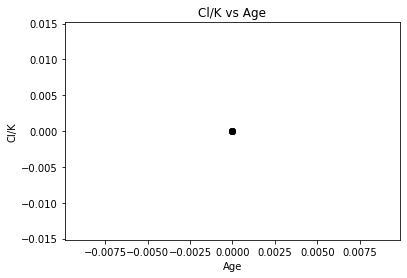

In [178]:
# Crea 'Cl/K vs Age'
plt.scatter(results_data['Age'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Cl/K vs Age')
plt.xlabel('Age')
plt.ylabel('Cl/K')

Text(0, 0.5, 'Ca/K')

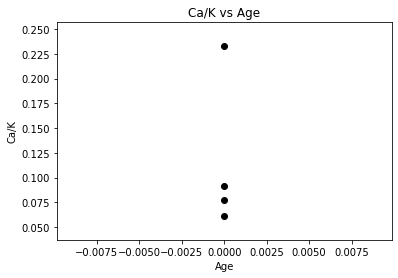

In [179]:
# Crea 'Ca/K vs Age'
plt.scatter(results_data['Age'],results_data['Ca/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Age')
plt.xlabel('Age')
plt.ylabel('Ca/K')

Text(0, 0.5, 'Cl/K')

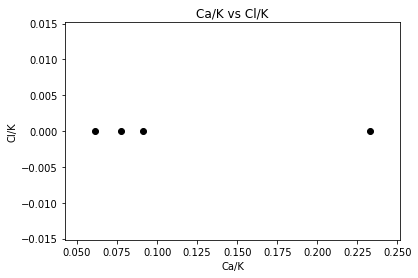

In [180]:
# Crea 'Ca/K vs Cl/K'
plt.scatter(results_data['Ca/K'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Cl/K')
plt.xlabel('Ca/K')
plt.ylabel('Cl/K')

In [181]:
# Crea Isocrona '36Ar/39Ar vs 39Ar/40Ar'
x = results_data['39/40'].dropna()
y = results_data['36/40'].dropna()

Text(0, 0.5, '36Ar/39Ar')

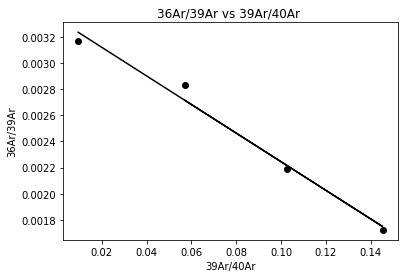

In [182]:
plt.plot(x, y, 'o',color = 'black'),

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color = 'black')
plt.title('36Ar/39Ar vs 39Ar/40Ar ')
plt.xlabel('39Ar/40Ar')
plt.ylabel('36Ar/39Ar')


In [183]:
x_intercept = -b/m
print ('x_intercept =',x_intercept )
print ('y_intercept =',b)
print ('slope =',m)

x_intercept = 0.3053519540117716
y_intercept = 0.0033375221378135244
slope = -0.010930082791233291


Crea Spectrum Age plot 

In [184]:
# Crea la cumulata dei valori nella colonna '% 39Ar' del dataframe results data
cumulative = results_data['% 39Ar'].cumsum()

In [185]:
cumulative_df = pd.DataFrame(cumulative)
cumulative_df

,% 39Ar
0,2.050871
1,10.552231
2,19.620829
3,23.976438
4,27.796182
5,39.278316
6,66.464882
7,97.113859
8,100.000000


In [186]:
# Crea dataframe Age+2error
age_più_2error_df = pd.DataFrame(results_data['Age+2error'])
age_più_2error_df

,Age+2error
0,0.068111
1,NaN
2,NaN
3,0.002406
4,0.004321
5,NaN
6,NaN
7,NaN
8,0.010063


In [187]:
# Crea dataframe Age-2error
age_meno_2error_df = pd.DataFrame(results_data['Age-2error'])
age_meno_2error_df

,Age-2error
0,-0.068111
1,NaN
2,NaN
3,-0.002406
4,-0.004321
5,NaN
6,NaN
7,NaN
8,-0.010063


In [188]:
# Duplica i valori della cumulata
double_cumulative_df = pd.DataFrame(np.repeat(cumulative_df.values,2,axis=0))
double_cumulative_df.columns = cumulative_df.columns
double_cumulative_df

,% 39Ar
0,2.050871
1,2.050871
2,10.552231
3,10.552231
4,19.620829
5,19.620829
6,23.976438
7,23.976438
8,27.796182
9,27.796182


In [189]:
# Rinomina il database double_cumulative (Cum%39)
double_cumulative_df= double_cumulative_df.rename(columns={"% 39Ar": "Cum%39"})
double_cumulative_df

,Cum%39
0,2.050871
1,2.050871
2,10.552231
3,10.552231
4,19.620829
5,19.620829
6,23.976438
7,23.976438
8,27.796182
9,27.796182


In [190]:
# Cancella l'ultima riga di (Cum%39)
double_cumulative_df=pd.DataFrame(double_cumulative_df.drop(index=9))
double_cumulative_df

,Cum%39
0,2.050871
1,2.050871
2,10.552231
3,10.552231
4,19.620829
5,19.620829
6,23.976438
7,23.976438
8,27.796182
10,39.278316


In [191]:
# Aggiungi "O" alla prima riga di (Cum%39)
double_cumulative_df.loc[-1] = [0]  # adding a row
double_cumulative_df.index = double_cumulative_df.index + 1  # shifting index
double_cumulative_df= double_cumulative_df.sort_index()  # sorting by index
double_cumulative_df


,Cum%39
0,0.000000
1,2.050871
2,2.050871
3,10.552231
4,10.552231
5,19.620829
6,19.620829
7,23.976438
8,23.976438
9,27.796182


In [192]:
# Duplica i valori di (Age+2error)
double_age_più_2error_df = pd.DataFrame(np.repeat(age_più_2error_df.values,2,axis=0))
double_age_più_2error_df.columns = age_più_2error_df.columns
double_age_più_2error_df

,Age+2error
0,0.068111
1,0.068111
2,NaN
3,NaN
4,NaN
5,NaN
6,0.002406
7,0.002406
8,0.004321
9,0.004321


In [193]:
# Duplica i valori di (Age+2error)
double_age_meno_2error_df = pd.DataFrame(np.repeat(age_meno_2error_df.values,2,axis=0))
double_age_meno_2error_df.columns = age_meno_2error_df.columns
double_age_meno_2error_df

,Age-2error
0,-0.068111
1,-0.068111
2,NaN
3,NaN
4,NaN
5,NaN
6,-0.002406
7,-0.002406
8,-0.004321
9,-0.004321


In [194]:
# Unione dei dataframe
double_cumulative_df['Age+2error'] = double_age_più_2error_df['Age+2error']
double_cumulative_df['Age-2error'] = double_age_meno_2error_df['Age-2error']
double_cumulative_df

,Cum%39,Age+2error,Age-2error
0,0.000000,0.068111,-0.068111
1,2.050871,0.068111,-0.068111
2,2.050871,NaN,NaN
3,10.552231,NaN,NaN
4,10.552231,NaN,NaN
5,19.620829,NaN,NaN
6,19.620829,0.002406,-0.002406
7,23.976438,0.002406,-0.002406
8,23.976438,0.004321,-0.004321
9,27.796182,0.004321,-0.004321


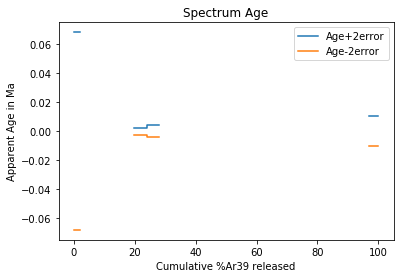

In [195]:
# Spectrum Age
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age+2error'], label = 'Age+2error')
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age-2error'], label = 'Age-2error')
plt.title('Spectrum Age')
plt.xlabel('Cumulative %Ar39 released')
plt.ylabel('Apparent Age in Ma')
plt.legend()